# 代表的な離散型確率分布

#### ノンパラメトリックな手法
母集団の確率分布に何の仮定も置かないこと
※母集団の確率分布の形状に何も仮定を置かないで推測統計を行なうことは簡単なものではない

#### パラメトリックな手法
母集団の性質から確率分布の形状に仮定を置いて母数を推測する方法。
ある程度、形を決め打ちするので Model としての表現力は乏しくなるが、推定は簡単になり解釈しやすい Model を作ることができる

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

from IPython.display import display


% precision 3


UsageError: Line magic function `%` not found.


離散型確率分布の性質を理解しやすくするため、いくつかの関数をあらかじめ用意しておく

In [19]:
# Graph の線の種類
linestyles = ['-', '--', ':']


# 期待値を求める関数
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])


# 分散を求める関数
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean) ** 2 * f(x_k) for x_k in x_set])


# 確率変数を引数に、その確率変数が確率の性質を満たしているか確認し、期待値と分散を計算して返す関数
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), '負の確率があります'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'確率の和が{prob_sum}になりました'
    print(f'期待値は {E(X):.4}')
    print(f'分散は {V(X):.4}')


# 確率変数を引数に、その確率変数の確率関数と期待値を図示するための関数
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='gray')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max() * 1.2)
    ax.legend()

    plt.show()

## ベルヌーイ分布（Bernoulli distribution）
- もっとも基本的な離散型確率分布
- とりうる値が０か１しかない確率分布
- ベルヌーイ分布に従う確率変数の試行のことをベルヌーイ試行といい１が成功、０が失敗になる。
- １が出る確率を p, ０がでる確率を 1-p とする。
- p がベルヌーイ分布の形を調整できる唯一の Params で確率の性質を満たす為に 0 <= p <= 1 を満たす必要がある

とりうる値が２通りしかないものはすべてベルヌーイ分布で考えることができる

In [7]:
def Beru(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

Beru(0.3) に従う確率変数 X を作ってみる

In [8]:
p = 0.3
X = Beru(p)

In [11]:
check_prob(X)

期待値は 0.3
分散は 0.21


確率変数 X を図示してみる

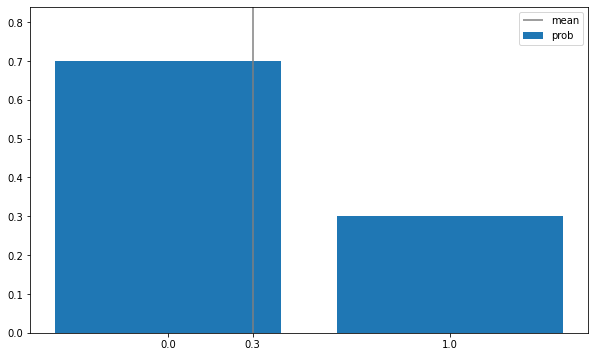

In [20]:
plot_prob(X)

In [21]:
rv = stats.bernoulli(p)

In [23]:
# .pmf() で確率関数を計算できる
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [28]:
# .pmf() に list を渡すと list の各要素に対応する確率を確認した numpy.ndarry が返ってくる
display(rv.pmf([0, 1]))

array([0.7, 0.3])

In [31]:
# .cdf() で累積密度関数を計算できる
display(rv.cdf([0, 1]))

array([0.7, 1. ])

In [35]:
# .mean() で期待値。.var() で分散を計算できる
rv.mean(), rv.var()

(0.300, 0.210)